# Importing modules

In [1]:
import numpy as np
import streamlit as st
import pandas as pd
import cv2
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import seaborn as sns
import matplotlib.pyplot as plt

2022-10-31 20:14:29.275 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-10-31 20:14:29.275 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


# Read csv file containing data.

In [2]:
df = pd.read_csv('muse_v3.csv')

In [3]:
df.isnull().sum()

lastfm_url                    0
track                         0
artist                        0
seeds                         0
number_of_emotion_tags        0
valence_tags                  0
arousal_tags                  0
dominance_tags                0
mbid                      28784
spotify_id                28371
genre                      6639
dtype: int64

In [4]:
df

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal
...,...,...,...,...,...,...,...,...,...,...,...
89996,https://www.last.fm/music/gaby%2bhoffmann%2b%2...,Battle,Gaby Hoffmann & Jay Duplass,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89997,https://www.last.fm/music/omar%2brodriguez-lop...,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent'],4,5.797887,4.132254,5.570563,NaN,NaN,progressive rock
89998,https://www.last.fm/music/ace%2bwhite/_/crookf...,Crookfield Zoo,Ace White,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89999,https://www.last.fm/music/second%2bchyld/_/tra...,Transparent (Full Version),Second Chyld,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN


In [5]:
df.genre

0                     rap
1                   metal
2                     rap
3                 hip-hop
4                   metal
               ...       
89996                 NaN
89997    progressive rock
89998                 NaN
89999                 NaN
90000             ambient
Name: genre, Length: 90001, dtype: object

In [6]:
unique_t1=df.number_of_emotion_tags.unique()

In [7]:
unique_t1

array([ 6,  8,  1, 13,  7,  9, 10, 20,  4,  3,  2, 11,  5, 12, 23, 15, 18,
       14, 16, 33, 32, 34, 22, 19, 21, 17, 26, 27, 37, 50, 41, 49, 28, 30,
       25, 24, 39, 47, 36, 35, 40, 38, 29, 31], dtype=int64)

In [8]:
df.dtypes

lastfm_url                 object
track                      object
artist                     object
seeds                      object
number_of_emotion_tags      int64
valence_tags              float64
arousal_tags              float64
dominance_tags            float64
mbid                       object
spotify_id                 object
genre                      object
dtype: object

In [9]:
df.columns

Index(['lastfm_url', 'track', 'artist', 'seeds', 'number_of_emotion_tags',
       'valence_tags', 'arousal_tags', 'dominance_tags', 'mbid', 'spotify_id',
       'genre'],
      dtype='object')

## Percentage of Null Values

In [10]:
per_null_train = df.isnull().sum().sort_values(0, ascending = False)/(df.shape[0])*100
print(per_null_train.head())

mbid          31.981867
spotify_id    31.522983
genre          7.376585
lastfm_url     0.000000
track          0.000000
dtype: float64


C:\Users\sanke\AppData\Local\Temp\ipykernel_17344\3247021228.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  per_null_train = df.isnull().sum().sort_values(0, ascending = False)/(df.shape[0])*100


## Treating the Null values

In [11]:
df['genre'].mode()

0    indie
Name: genre, dtype: object

In [12]:
df['genre']=df['genre'].fillna('indie')

In [13]:
df['mbid'].mode()

0        00032e29-ab60-440c-9eda-6f3808976fac
1        00033929-8ea2-493f-b91a-87bd1fb8cd49
2        00050c2a-85c3-4c18-b9c2-20bb0bb306e0
3        00072a88-82a0-4688-b92e-40ee813f7721
4        0008200b-ad7b-4c6d-8b94-ae791426019e
                         ...                 
61212    fffbd723-2335-442f-84ac-28ffa00dc0ec
61213    fffc20cf-2da3-410b-a532-32051a6b5593
61214    fffcd4ae-de6c-417f-8774-00630849f3d5
61215    fffe757f-5e1c-4de3-b3af-32589fe1772c
61216    ffff2269-d2f3-4346-8a53-a2172e98096a
Name: mbid, Length: 61217, dtype: object

In [14]:
df.dropna(subset=['mbid'], inplace=True)

In [15]:
df.dropna(subset=['spotify_id'], inplace=True)

In [16]:
df.isnull().sum()

lastfm_url                0
track                     0
artist                    0
seeds                     0
number_of_emotion_tags    0
valence_tags              0
arousal_tags              0
dominance_tags            0
mbid                      0
spotify_id                0
genre                     0
dtype: int64

# Displaying the Data

In [17]:
df.shape

(50118, 11)

## Data Preprocessing

# Renaming column of dataframe.

In [18]:
df['link'] = df['lastfm_url']
df['name'] = df['track']
df['emotional'] = df['number_of_emotion_tags']
df['pleasant'] = df['valence_tags']

# Taking out useful column.

In [19]:
df1 = df[['name','emotional','pleasant','link','artist']]

In [20]:
df1

,name,emotional,pleasant,link,artist
0,'Till I Collapse,6,4.550000,https://www.last.fm/music/eminem/_/%2527till%2...,Eminem
1,St. Anger,8,3.710000,https://www.last.fm/music/metallica/_/st.%2banger,Metallica
3,Bamboo Banga,13,6.555071,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,M.I.A.
4,Die MF Die,7,3.771176,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Dope
5,Step Up,9,2.971389,https://www.last.fm/music/drowning%2bpool/_/st...,Drowning Pool
...,...,...,...,...,...
89983,Secret,1,5.370000,https://www.last.fm/music/quietdrive/_/secret,Quietdrive
89985,The Last of the Rest Was the End,1,5.370000,https://www.last.fm/music/medications/_/the%2b...,Medications
89986,Lovechild,2,6.685000,https://www.last.fm/music/daniel%2blanois/_/lo...,Daniel Lanois
89991,Last Inhale,6,4.301667,https://www.last.fm/music/tapage/_/last%2binhale,Tapage


# Sort column based on emotional & pleasant column value.
# Pleasant = degree of pleasant in that particular song.
# Emotional = emotional word used in that song.

In [21]:
df1 = df1.sort_values(by=["emotional", "pleasant"])
df1.reset_index()

,index,name,emotional,pleasant,link,artist
0,66259,Hold Still,1,2.100000,https://www.last.fm/music/grizzly%2bbear/_/hol...,Grizzly Bear
1,66282,Bad Habit,1,2.100000,https://www.last.fm/music/foals/_/bad%2bhabit,Foals
2,66285,Wakin On A Pretty Day,1,2.100000,https://www.last.fm/music/kurt%2bvile/_/wakin%...,Kurt Vile
3,66332,Lullaby,1,2.100000,https://www.last.fm/music/nickelback/_/lullaby,Nickelback
4,66338,"III. Telegraph Ave. (""Oakland"" by Lloyd)",1,2.100000,https://www.last.fm/music/childish%2bgambino/_...,Childish Gambino
...,...,...,...,...,...,...
50113,9681,I Want You,40,4.582073,https://www.last.fm/music/elvis%2bcostello%2b%...,Elvis Costello & The Attractions
50114,7218,Six,40,5.607477,https://www.last.fm/music/john%2bmost/_/six,John Most
50115,7323,Eight,40,5.697157,https://www.last.fm/music/john%2bmost/_/eight,John Most
50116,7326,Sixteen,40,5.791404,https://www.last.fm/music/john%2bmost/_/sixteen,John Most


# Getting out the Columns

In [22]:
df1.columns

Index(['name', 'emotional', 'pleasant', 'link', 'artist'], dtype='object')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50118 entries, 66259 to 6507
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       50118 non-null  object 
 1   emotional  50118 non-null  int64  
 2   pleasant   50118 non-null  float64
 3   link       50118 non-null  object 
 4   artist     50118 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [24]:
df1.shape

(50118, 5)

In [25]:
df1.describe()

,emotional,pleasant
count,50118.000000,50118.000000
mean,4.460992,5.513605
std,4.325437,1.545981
min,1.000000,0.235000
25%,2.000000,4.376471
50%,3.000000,5.731390
75%,6.000000,6.745000
max,47.000000,8.470000


## Checking For Null Values

In [26]:
df1.isnull().sum()

name         0
emotional    0
pleasant     0
link         0
artist       0
dtype: int64

<AxesSubplot:>

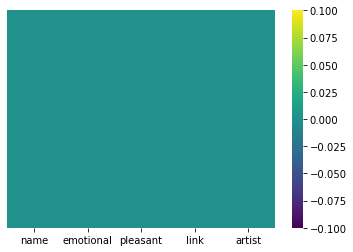

In [27]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap="viridis")

#### The Dataset muse does not have the null values

# Diving dataframe based on emotional & pleasant value in sorted order.

In [28]:
df_sad = df[:18000]
df_fear = df[18000:36000]
df_angry = df[36000:54000]
df_neutral = df[54000:72000]
df_happy = df[72000:]

# Task of function 'fun' is to take list of unique emotions & return dataframe of 30 rows.

In [29]:
def fun(list):

    # Creating Empty Dataframe
    data = pd.DataFrame()

    # If list of emotion's contain only 1 emotion
    if len(list) == 1:
        # Emotion name
        v = list[0]

        # Number of rows for this emotion
        t = 30

        if v == 'Neutral':
            # Adding rows to data
            data = data.append(df_neutral.sample(n=t))

        elif v == 'Angry':
            # Adding rows to data
            data = data.append(df_angry.sample(n=t))

        elif v == 'fear':
            # Adding rows to data
            data = data.append(df_fear.sample(n=t))

        elif v == 'happy':
            # Adding rows to data
            data = data.append(df_happy.sample(n=t))

        else:
            # Adding rows to data
            data = data.append(df_sad.sample(n=t))

    elif len(list) == 2:
        # Row's count per emotion
        times = [20,10]

        for i in range(len(list)):
            # Emotion name
            v = list[i]

            # Number of rows for this emotion
            t = times[i]

            if v == 'Neutral':
                # Adding rows to data
                data = data.append(df_neutral.sample(n=t))

            elif v == 'Angry':
                # Adding rows to data
                data = data.append(df_angry.sample(n=t))

            elif v == 'fear':
                # Adding rows to data
                data = data.append(df_fear.sample(n=t))

            elif v == 'happy':
                # Adding rows to data
                data = data.append(df_happy.sample(n=t))

            else:
                # Adding rows to data
                data = data.append(df_sad.sample(n=t))

    elif len(list) == 3:
        # Row's count per emotion
        times = [15,10,5]

        for i in range(len(list)):
            # Emotion name
            v = list[i]

            # Number of rows for this emotion
            t = times[i]

            if v == 'Neutral':
                # Adding rows to data
                data = data.append(df_neutral.sample(n=t))

            elif v == 'Angry':
                # Adding rows to data
                data = data.append(df_angry.sample(n=t))

            elif v == 'fear':
                # Adding rows to data
                data = data.append(df_fear.sample(n=t))

            elif v == 'happy':
                # Adding rows to data
                data = data.append(df_happy.sample(n=t))

            else:
                # Adding rows to data
                data = data.append(df_sad.sample(n=t))

    elif len(list) == 4:
        # Row's count per emotion
        times = [10,9,8,3]

        for i in range(len(list)):
            # Emotion name
            v = list[i]

            # Number of rows for this emotion
            t = times[i]

            if v == 'Neutral':
                # Adding rows to data
                data = data.append(df_neutral.sample(n=t))

            elif v == 'Angry':
                # Adding rows to data
                data = data.append(df_angry.sample(n=t))

            elif v == 'fear':
                # Adding rows to data
                data = data.append(df_fear.sample(n=t))

            elif v == 'happy':
                # Adding rows to data
                data = data.append(df_happy.sample(n=t))

            else:
                # Adding rows to data
                data = data.append(df_sad.sample(n=t))
    else:
        # Row's count per emotion
        times = [10,7,6,5,2]

        for i in range(len(list)):
            # Emotion name
            v = list[i]

            # Number of rows for this emotion
            t = times[i]

            if v == 'Neutral':
                # Adding rows to data
                data = data.append(df_neutral.sample(n=t))

            elif v == 'Angry':
                # Adding rows to data
                data = data.append(df_angry.sample(n=t))

            elif v == 'fear':
                # Adding rows to data
                data = data.append(df_fear.sample(n=t))

            elif v == 'happy':
                # Adding rows to data
                data = data.append(df_happy.sample(n=t))

            else:
                # Adding rows to data
                data = data.append(df_sad.sample(n=t))
    return data

## Task of function 'pre' is to take list of emotions (containing duplicate also) &
### return unique list of emotion in sorted order based on count.

In [30]:
def pre(l):
    # result contain sorted emotion's(duplicate present if any)
    # Counter has a most_common() method that returns a list of tuples of (element, count) sorted by counts.
    result = [item for items, c in Counter(l).most_common()
              for item in [items] * c]

    # Creating empty unique list
    ul = []

    for x in result:
        if x not in ul:
            ul.append(x)
    return ul

## TOP 10 Artist

In [31]:
a=df.artist.value_counts()[:10]
a1=a.head(15)
a1

Bob Dylan               139
They Might Be Giants    108
Warren Zevon            104
Tom Waits               103
The Beatles              93
Radiohead                88
The Cure                 84
of Montreal              81
Robbie Williams          79
David Bowie              77
Name: artist, dtype: int64

C:\Users\sanke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 Genres')

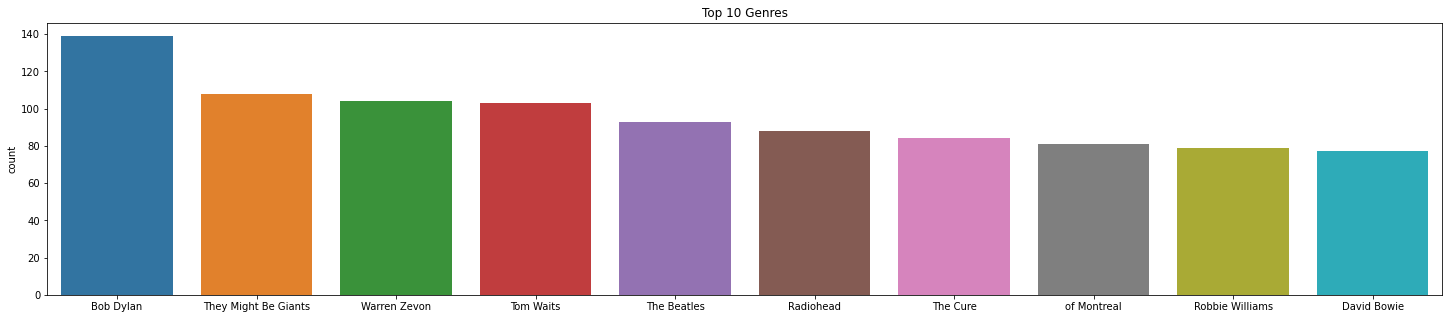

In [32]:
ind=a.index
ls=[]
for i in range(len(a)):
    t=[ind[i]]*a[i]
    ls+=t
plt.subplots(figsize=(25,5))
sns.countplot(ls)
plt.title("Top 10 Genres")

### Analysing the pleasant with the emotional in which the game released 

<Figure size 1800x1800 with 0 Axes>

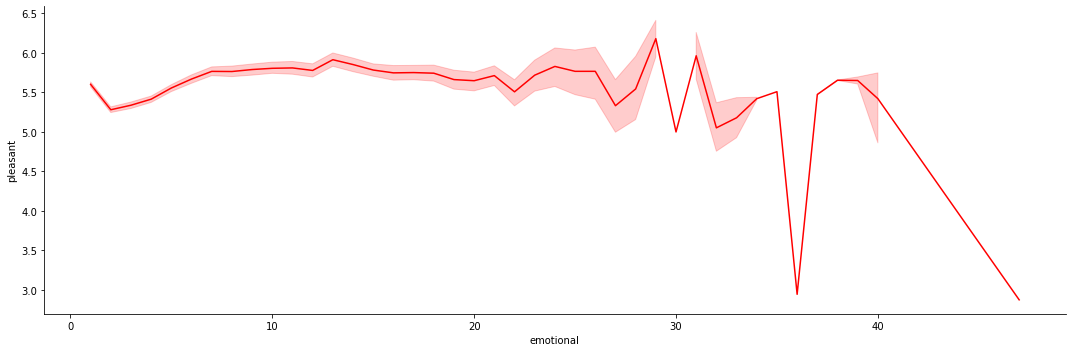

In [33]:
plt.figure(figsize=(25,25))
sns.relplot(x="emotional", y="pleasant", data=df1,kind='line',aspect=3,color="Red")
plt.show()

### Top Genre 

In [34]:
c=df.genre.value_counts()[:10]
pub=c.head(15)
pub

indie          6797
rock           4220
pop            3071
electronic     2801
folk           1773
alternative    1490
ambient        1432
soul           1149
soundtrack      954
jazz            943
Name: genre, dtype: int64

In [35]:
pub

indie          6797
rock           4220
pop            3071
electronic     2801
folk           1773
alternative    1490
ambient        1432
soul           1149
soundtrack      954
jazz            943
Name: genre, dtype: int64

C:\Users\sanke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 Genres')

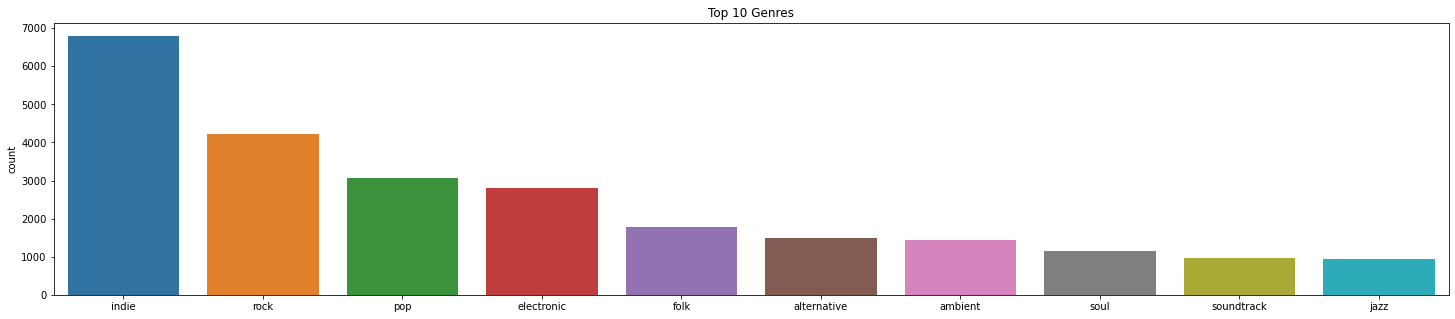

In [36]:
ind=c.index
ls=[]
for i in range(len(c)):
    t=[ind[i]]*c[i]
    ls+=t
plt.subplots(figsize=(25,5))
sns.countplot(ls)
plt.title("Top 10 Genres")

## Top Sentiments

In [37]:
s=df.seeds.value_counts()[:10]
senti=s.head(15)
senti

['sleazy']        629
['sexy']          559
['aggressive']    540
['romantic']      536
['angry']         533
['epic']          507
['smooth']        501
['erotic']        498
['light']         483
['happy']         473
Name: seeds, dtype: int64

C:\Users\sanke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 seeds')

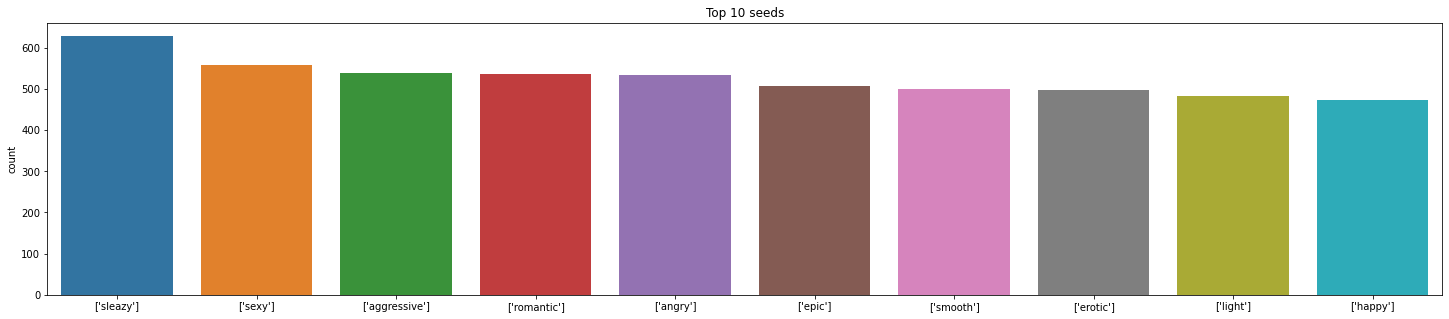

In [38]:
ind=s.index
ls=[]
for i in range(len(s)):
    t=[ind[i]]*s[i]
    ls+=t
plt.subplots(figsize=(25,5))
sns.countplot(ls)
plt.title("Top 10 seeds")

# Creating model
# kerel_size = specifying the height and width of the 2D convolution window.
# Convolution window : A convolution layer defines a window by which we examine a subset of the image.

In [39]:
"""RELU : The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, 
otherwise, it will output zero."""
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# MaxPooling2D : Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter

In [40]:
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout is a technique where randomly selected neurons are ignored during training.Dropout is a technique where randomly selected neurons are ignored during training.

In [41]:
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# Softmax : It is mainly used to normalize neural networks output to fit between zero and one.

In [42]:
model.add(Dense(7, activation='softmax'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

# Loading weights from pretrained model

In [44]:
model.load_weights('model.h5')

In [45]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Not Attach OpenCL context to OpenCV. 

In [46]:
cv2.ocl.setUseOpenCL(False)
# return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)

# return video from the first webcam on your computer.

In [47]:
cap = cv2.VideoCapture(0)

# Text or heading's

In [48]:
st.markdown("<h2 style='text-align: center; color: white;'><b>Emotion based music recommendation</b></h2>", unsafe_allow_html=True)
st.markdown("<h5 style='text-align: center; color: grey;'><b>Click on the name of recommended song to reach website</b></h5>", unsafe_allow_html=True)


2022-10-31 20:14:41.905 
  command:

    streamlit run C:\Users\sanke\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

### Streamlit Development

In [49]:
# Just for indentation
col1,col2,col3 = st.columns(3)

list = []
with col1:
    pass
with col2:
    if st.button('SCAN EMOTION(Click here)'):

        # Clearing values
        count = 0
        list.clear()

        while True:
            # Basically, ret is a boolean regarding whether or not there was a return at all, at the frame is each frame that is returned.
            ret, frame = cap.read()
            if not ret:
                break
            # CascadeClassifier : It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images.
            face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
            # cv2.cvtColor() method is used to convert an image from one color space to another.
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Detects objects of different sizes in the input image.
            faces = face.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
            # Counter
            count = count + 1

            for (x, y, w, h) in faces:
                # Creating rectangle around face
                cv2.rectangle(frame, (x, y - 50), (x + w, y + h + 10), (255, 0, 0), 2)
                # Taking image out
                roi_gray = gray[y:y + h, x:x + w]
                # expand_dims() function is used to expand the shape of an array.
                cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)

                # Predicting model on cropped image
                prediction = model.predict(cropped_img)

                # Appending emotion to list
                max_index = int(np.argmax(prediction))
                list.append(emotion_dict[max_index])

                # Putting text of emotion on top of rectangle
                # fontScale = 1
                # thickness = 2
                cv2.putText(frame, emotion_dict[max_index], (x + 20, y - 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                # Image interpolation occurs when you resize or distort your image from one pixel grid to another. 
                cv2.imshow('Video', cv2.resize(frame, (1000, 700), interpolation=cv2.INTER_CUBIC))

            # For emergency close window
            if cv2.waitKey(1) & 0xFF == ord('x'):
                break

            # To get time for window to stay, so that we take input
            if count >= 20:
                break

        # Destroy cv2 window
        cap.release()
        cv2.destroyAllWindows()

        # Preprocessing list of emotion's
        list = pre(list)

with col3:
    pass

# Calling 'fun()' or creating dataframe
new_df = fun(list)

# Just for separation
st.write("")

# Normal text
st.markdown("<h5 style='text-align: center; color: grey;'><b>Recommended song's with artist names</b></h5>", unsafe_allow_html=True)

# Just for separation
st.write("---------------------------------------------------------------------------------------------------------------------")

try:
    # l = iterator over link column in dataframe
    # a = iterator over artist column in dataframe
    # i = iterator from (0 to 30)
    # n = iterator over name column in dataframe
    for l,a,n,i in zip(new_df["link"],new_df['artist'],new_df['name'],range(30)):

        # Recommended song name
        st.markdown("""<h4 style='text-align: center;'><a href={}>{} - {}</a></h4>""".format(l,i+1,n),unsafe_allow_html=True)

        # Artist name
        st.markdown("<h5 style='text-align: center; color: grey;'><i>{}</i></h5>".format(a), unsafe_allow_html=True)

        # Just for separation
        st.write("---------------------------------------------------------------------------------------------------------------------")
except:
    pass